# <center> Final Examination

ข้อที่ 2 

<img src="https://drive.google.com/uc?id=1TgD4z0mmcc_fhFcuY1m-P0s4BicDTaqx" align=right width=150>  

<div align=right> อารยา ด่านประชุม <br>รหัสนักศึกษา 1710511104053 </dvi>

In [1]:
#Dual moving average crossover ของหุ้น AAPL (ข้อมูล ณ 1 มี.ค.2018 - 1 มี.ค.2021)


In [26]:
# Import the libraries

import pandas as pd
from pandas_datareader import data
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
# Load the data

AAPL = data.DataReader('AAPL', data_source="yahoo", start='2018-03-01', end='2021-03-01')
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-28,45.154999,44.512501,44.814999,44.529999,151128400.0,42.962379
2018-03-01,44.945000,43.165001,44.634998,43.750000,195208000.0,42.209846
2018-03-02,44.075001,43.112499,43.200001,44.052502,153816000.0,42.501698
2018-03-05,44.435001,43.630001,43.802502,44.205002,113605600.0,42.648827
2018-03-06,44.562500,44.032501,44.477501,44.167500,95154000.0,42.612656


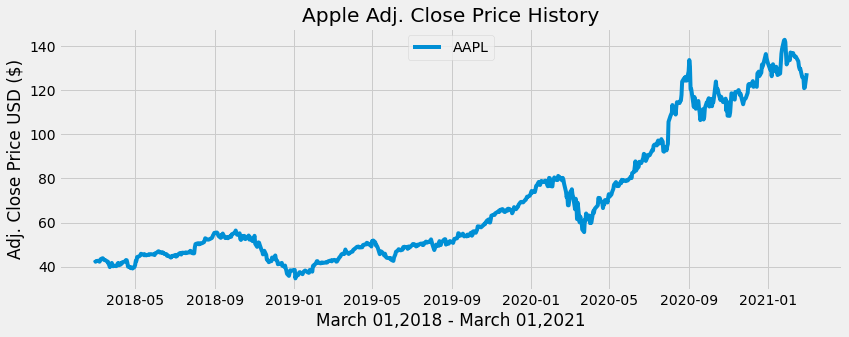

In [28]:
# Visualize the data

plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('March 01,2018 - March 01,2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper center')
plt.show()

เป็นการแสดงภาพชุดข้อมูลหุ้น Apple ตั้งเเต่ 1 มี.ค.2018 ถึงวันที่ 1 มี.ค.2021 และสิ่งที่น่าสนใจสามารถดูได้ว่าถ้าคุณซื้อหุ้นของ Aappleในราคาที่ 40 เหรียญในปี2018 และดูเหมือนว่าในปี2019 วันที่ 1มูลค่ามันต่ำกว่า 40เหรียญ หลังจากนั้นในวันที่ 1 เดือน มีนาคม ปี2021 ถ้าคุณยังถือหุ้นนี้ไว้มูลค่าที่มีในมือจะได้รับผลตอบเเทนประมาณ 140 เหรียญ เพิ่มขึ้นเป็น 3.5 เท่า ดั้งนันเป็นการลงทุนที่ดี

In [29]:
# create the simple moving average with a 30 day window

SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
Date,
2018-02-28,NaN
2018-03-01,NaN
2018-03-02,NaN
2018-03-05,NaN
2018-03-06,NaN
...,...
2021-02-23,133.520064
2021-02-24,133.405478
2021-02-25,133.151551


In [30]:
# create the simple moving average with a 100 day window

SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
Date,
2018-02-28,NaN
2018-03-01,NaN
2018-03-02,NaN
2018-03-05,NaN
2018-03-06,NaN
...,...
2021-02-23,124.513904
2021-02-24,124.613023
2021-02-25,124.658774


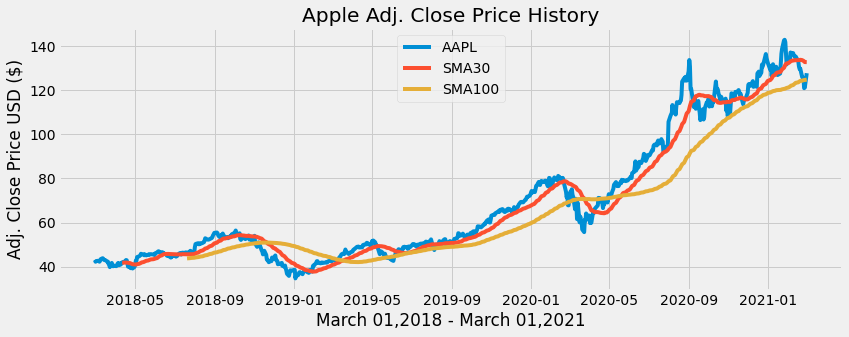

In [33]:
#  Visualize the data


plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('March 01,2018 - March 01,2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper center')
plt.show()

In [91]:
 #Create a function to signal when to buy and sell the asset/stock
    
    
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['AAPL'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['AAPL'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy,sigPriceSell)

In [92]:
#store the buy and sell data into a variable


buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [88]:
#Show the data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2018-02-28,42.962379,NaN,NaN,NaN,NaN
2018-03-01,42.209846,NaN,NaN,NaN,NaN
2018-03-02,42.501698,NaN,NaN,NaN,NaN
2018-03-05,42.648827,NaN,NaN,NaN,NaN
2018-03-06,42.612656,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-02-23,125.860001,133.520064,124.513904,NaN,NaN
2021-02-24,125.349998,133.405478,124.613023,NaN,NaN
2021-02-25,120.989998,133.151551,124.658774,NaN,NaN


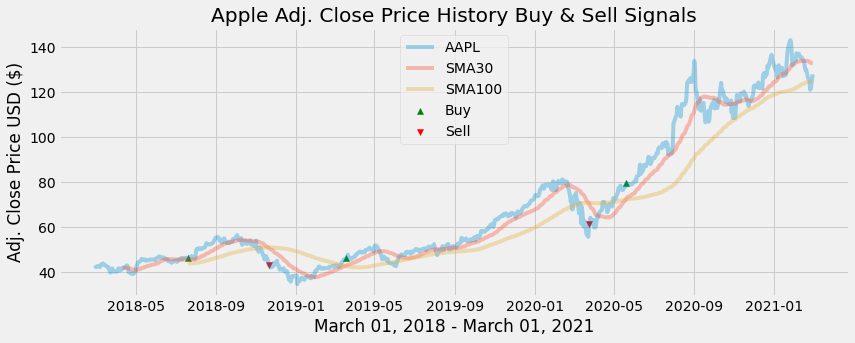

In [96]:
#Visualize the data and the strategy to buy and sell the stock


plt.figure(figsize=(12.6, 4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30' ], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label  = 'SMA100' , alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price History Buy & Sell Signals')
plt.xlabel('March 01, 2018 - March 01, 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper center')
plt.show()

จากกราฟเราจะเห็นว่า indicaterที่เรียกว่าเส้น SMA บอกแนวโน้มของราคาเพื่อที่เราสามารถจะจับจังหวะเข้าซื้อขายได้ 
เราจะให้ SMA30 วัน เเทนแนวโน้มระยะสั้น 
และเส้น SMA100 วัน เเทนเเนวโน้มระยะยาว
จากกราฟเราสังเกตได้่ว่าในช่วงปี 2018 - 2019 ราคาของหุ้นอยู่ใต้เส้นเฉลี่ยทั้ง 2 เส้นบ่งบอกว่ามันกำลังเปลี่ยนเป็นเเนวโน้มขาลงเป็นสัญญาณให้ขาย จากนั้นในปี 2019-2021 เราจะเห็นจังหวะให้เข้าซื้อมี 2 จังหวะ เป็นเส้นราคาที่อยู่เหนือเส้นเฉลี่ยทั้งระยะสั้นเเละระยะยาวเเนวโน้มของมันกำลังเปลี่ยนเป็นขาขึ้นมากกว่าปีที่ผ่านๆมา และเส้นSMAยังบอกถึงเเนวรับเเละเเนวต้านได้เป็นอย่างดีว่าจุดไหนที่จะมีเเรงซื้อและเเรงขาย เช่น จุดที่เห็นได้ชัดเจน คือปี2019ในช่วงเดือน1 มันเป็นเเนวรับที่บอกว่ามันมีความต้องการซื้อมาก(เพื่อไม่ให้ราคามันต่ำไปกว่านี้) เพื่อดึงราคาให้ดันขึ้นไปเรื่อย พอปี2020ในเดือน9 มีจุดเเนวต้านเพราะราคามันดีดขึ้นไปจากเดิมเยอะในจุดนี่เองที่มีการเทขายเเต่เห็นได้ว่าเเรงขายไม่มากพอจึงทำให้กราฟยังคงมีเเนวโน้มขาขึ้นอยู่แต่ก็เหมือนราคาจะตกลงมาในช่วงสุดท้าย